In [25]:
# Importing Packages
import numpy as np
import pandas as pd

In [26]:
# data = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv'
# !wget $data #This is for linux machin, we can download it for windows it just get the data from the address and save it.

In [27]:
# Loading the data
df = pd.read_csv('../datasets/carPridiction/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


As we can see there are some inconsistency with the data. Some of the header have underscore some don't. Some have smallcase some don't. So we now have to clean data and make it consistant.

## Explonatory Data Analysis

In [28]:
# Making heading consistent
# df.columns # It will return all the headers.
df.columns = df.columns.str.lower().str.replace(' ','_') # It will make all the headers lowercase and will replace spaces with underscore.
df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [29]:
# Making the data consistant
column_string = list(df.dtypes[df.dtypes == 'object'].index)
# column_string
for col in column_string:
    df[col] = df[col].str.lower().str.replace(' ','_') # It will take every column and modify every element by looping through it.
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [30]:
# Getting to know the data more
for col in df.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240']
914

year
[2011 2012 2013 1992 1993 1994 2017 1991 2016 1990]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'
 'electric' 'flex-fuel_(premium_unleaded_recommended/e85)' 'natural_gas'
 'flex-fuel_(premium_unleaded_required/e85)'
 'flex-fuel_(unleaded/natural_gas)']
10

engine_hp
[335. 300. 230. 320. 172. 160. 130. 158. 240. 248.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.  0. nan 10.  3. 16.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'


In [31]:
# Importing ploting and visualizing packages
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

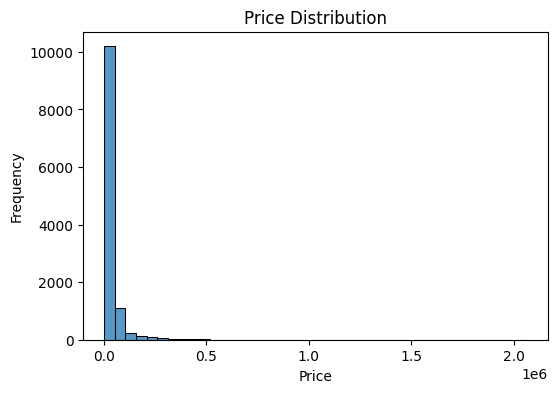

In [32]:
# Visualizing data
plt.figure(figsize=(6,4))
sns.histplot(df.msrp, bins=40)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

plt.show()

Above we can see from the histogram following things:
- Most of the car is cheap
- Price is starting from around 100k
- Data has a long tail distribution
- Data is negatively skewed from normal

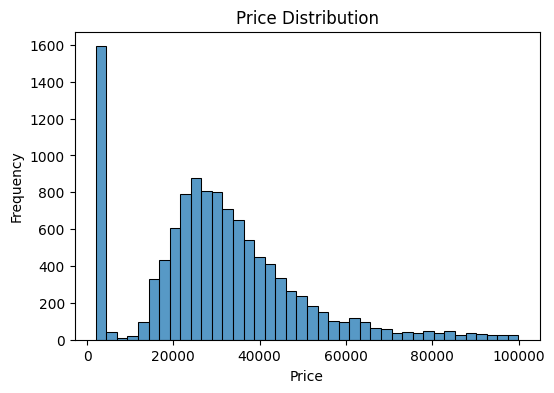

In [33]:
#Zooming in
plt.figure(figsize=(6,4))
sns.histplot(df.msrp[df.msrp < 100000], bins=40)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

plt.show()

After Filtering we can see that:
- Around 1600 cars has a value of approximately 10k
- Most of the car has a price range of 21k to 30k
- Data is still long tail distributed
- It may confuse our model, so transformation suggested

In [34]:
print(np.log([1,10,100,1000,10000]))
print(np.log([0,1,10,100,1000,10000])) #will give a warning or error as log(0) is undefined. 
print(np.log([0 + 1,1 + 1,10 + 1,100 + 1,1000 + 1,10000 + 1]))
print(np.log1p([0,1,10,100,1000,10000]))

[0.         2.30258509 4.60517019 6.90775528 9.21034037]
[      -inf 0.         2.30258509 4.60517019 6.90775528 9.21034037]
[0.         0.69314718 2.39789527 4.61512052 6.90875478 9.21044037]
[0.         0.69314718 2.39789527 4.61512052 6.90875478 9.21044037]


e:\app\Python\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


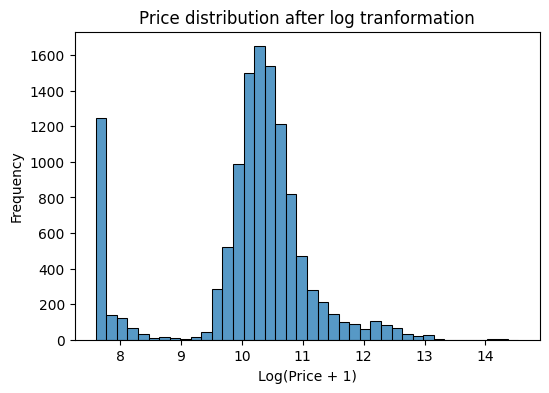

In [35]:
# Log transformation for normalizing the data
log_values = np.log1p(df.msrp)
plt.figure(figsize=(6, 4))

sns.histplot(log_values, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price distribution after log tranformation')

plt.show()
# log_values

Above after transforming the data by log transformation:
- Data has almost normal distribution
- It is suitable for fitting

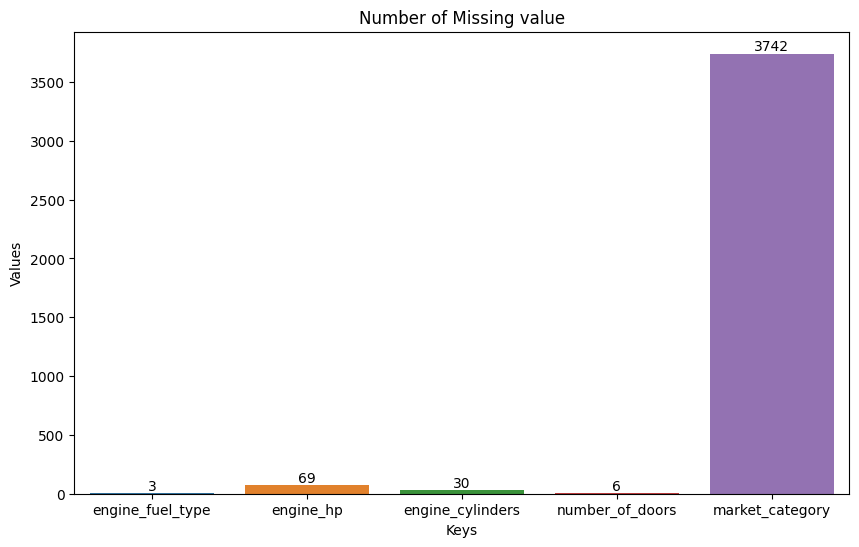

In [36]:
# Visualization of missing value
val = df.isnull().sum().to_dict()

missing_val = pd.DataFrame.from_dict(val, orient='index', columns=['Value'])
missing_val = missing_val[missing_val['Value'] != 0]
# missing_val
plt.figure(figsize=(10, 6))
bar = sns.barplot(x=missing_val.index, y=missing_val['Value'])
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Number of Missing value')

for i in bar.containers:
    bar.bar_label(i,)

## Validation framework
<!DOCTYPE html>
<html>
<head>
  <style>
    .box {
      width: 300px;
      height: 100px;
      border: 1px solid #000;
      position: relative;
    }
    .part {
      height: 100%;
      position: absolute;
    }
    .train {
      width: 60%;
      background-color: #FFD700;
      border: 1px solid #000;
    }
    .val {
      width: 20%;
      background-color: #FF8C00;
      left: 60%;
      border: 1px solid #000;
    }
    .test {
      width: 20%;
      background-color: #FF4500;
      left: 80%;
      border: 1px solid #000;
    }
    .label {
      position: absolute;
      top: 50%;
      left: 50%;
      transform: translate(-50%, -50%);
      color: #000;
      font-weight: bold;
    }
  </style>
</head>
<body>
  <div class="box">
    <div class="part train">
      <span class="label">Train</span>
      <p class="label">60%</p>
    </div>
    <div class="part val">
      <span class="label">Val</span>
      <p class="label">20%</p>
    </div>
    <div class="part test">
      <span class="label">Test</span>
      <p class="label">20%</p>
    </div>
  </div>
</body>
</html>

In [37]:
# df.head()
n = len(df)
n_val = int(n * 0.2)
n_val_df = df[:n_val]
n_train = int(n * 0.8)
n_train_df = df[n_val:n_train]
# print(n_val_df.head())
# print(n_train_df.head())
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [38]:
n_val_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [39]:
n_train_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2382,porsche,cayenne,2017,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,159600
2383,porsche,cayenne,2017,premium_unleaded_(required),420.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,24,17,1715,76200
2384,porsche,cayman_s,2006,premium_unleaded_(required),295.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,26,18,1715,58900
2385,porsche,cayman,2014,premium_unleaded_(required),275.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,30,20,1715,52600
2386,porsche,cayman,2014,premium_unleaded_(required),325.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,1715,63800


From cell no 36,37,38 we can clearly see that our dataset is sorted so if we split the data from tip to toe then we will get on type type of data in validation process which in turn will not avilable in training process.
As a result we will have biased model which will be inefficient for machine learning.

**Solution: We need to shuffle the data so that we can get random part of data in every section** 

In [40]:
# Splitting the dataset for validation
np.random.seed(2) # Setting the exact seed.

n = len(df) # Knowing the lentgh.

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_test + n_val)

idx = np.arange(n) # Arranging the index from 0 to n-1.
np.random.shuffle(idx) # Shuffling the indecies so that we don't get same type of data for validation and different type of data for training.

df_shuffled = df.iloc[idx]
df_shuffled.head()

# (n, n_test + n_train + n_val)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


As we can see that the data is randomly shuffled, thus if we split the dataset we will get random section for each part of dataset.

In [41]:
df_train_org = df_shuffled.iloc[:n_train]
df_val_org = df_shuffled.iloc[n_train:n_train+n_val]
df_test_org = df_shuffled.iloc[n_train+n_val:]

In [42]:
df_train_org.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [43]:
df_val_org.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995


In [44]:
df_test_org.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905


Finally our datasets are ready according to our validation framework.

In [45]:
# Reindexing the datasets so that it can be consistant
df_train = df_train_org.reset_index(drop=True).copy()
df_val = df_val_org.reset_index(drop=True).copy()
df_test = df_test_org.reset_index(drop=True).copy()

# Getting the msrp values
y_train_org = df_train.msrp.values
y_val_org = df_val.msrp.values
y_test_org = df_test.msrp.values

# Storing the values of msrp with log transformation
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

# Droping the msrp from the splitted dataset as they are stored in our target dataset
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']
# df_train.head()

Above we have matrix X where all the feature of cars are available except prices, as they are stored in our target matrix Y. So we now are ready to have our matrix X and Y to be maped over and build our model.

# Linear Regression Basic

In [46]:
w = np.full(5,2)
w

array([2, 2, 2, 2, 2])

In [47]:
demo_feature = df_train.iloc[10][['engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg', 'city_mpg', 'popularity']].values.astype(int)
demo_target = y_train[10]
b = 7.65231
w = [0.01, 0.002, 0.003, 0.0004, 0.0004, 0.01]

def lin_reg(demo_feature):
    n = len(demo_feature)
    
    pred = b
    for i in range(n):
        pred = pred + (w[i] * demo_feature[i])
    return pred
lin_reg(demo_feature),demo_target, demo_feature
print(f'Predicted value by Linear Regression model: {lin_reg(demo_feature)}, Actual target value: {demo_target}')

Predicted value by Linear Regression model: 13.08431, Actual target value: 13.08107460729463


So, basically this is how linear regression model works, But on catch is the $bias = b$ value gets calculated beforehand.

In [48]:
x = np.ones(shape=[])
x
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X.shape, X

((3, 4),
 array([[   1,  148,   24, 1385],
        [   1,  132,   25, 2031],
        [   1,  453,   11,   86]]))

### Linear Regression vector form


In [49]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [50]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [52]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [53]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)
linear_regression(xi)

12.312

In [54]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

def linear_regression(X):
    return X.dot(w_new)

linear_regression(X)

array([12.38 , 13.552, 12.312])

### Training a Linear Regression Model

In [60]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [61]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
train_linear_regression(X, y)
    

(25844.754055766763, array([ -16.08906468, -199.47254894,   -1.22802883]))